In [124]:
import pandas as pd

In [125]:
real_df_1 = pd.read_excel('../datasets/online_retail_II.xlsb', sheet_name='Year 2009-2010')

In [126]:
real_df_2 = pd.read_excel('../datasets/online_retail_II.xlsb', sheet_name= 'Year 2010-2011')

In [127]:
real_df = pd.concat([real_df_1, real_df_2])

In [128]:
df = real_df.copy()

In [129]:
df.info()
df.head()

<class 'pandas.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  float64
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  str    
dtypes: float64(3), int64(1), object(3), str(1)
memory usage: 73.3+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,40148.322917,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,40148.322917,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,40148.322917,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,40148.322917,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,40148.322917,1.25,13085.0,United Kingdom


In [130]:
isna_counts = df.isna().sum().to_dict()
isna_counts = pd.DataFrame.from_dict(isna_counts, orient='index', columns=['Count']).sort_values(ascending=False, by='Count')
isna_counts['Percentage'] = round((isna_counts['Count'] / len(df)) * 100, 2)
print('Count of Missing Values:')
display(isna_counts)

Count of Missing Values:


,Count,Percentage
Customer ID,243007,22.77
Description,4382,0.41
StockCode,0,0.00
Invoice,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
Price,0,0.00
Country,0,0.00


In [131]:
duplicated_counts = df.duplicated().sum()
print('Count of Duplicated Rows: ', duplicated_counts)

duplicated_samples = df[df.duplicated()]
display(duplicated_samples.head())

Count of Duplicated Rows:  34335


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,40148.481944,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,40148.481944,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,40148.481944,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,40148.481944,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,40148.481944,3.75,16329.0,United Kingdom


In [132]:
nunique_counts = dict()
for i in df.columns:
    nunique_counts[i] = df[i].nunique()

nunique_counts = pd.DataFrame.from_dict(nunique_counts, orient='index', columns=['Count']).sort_values(ascending=False, by='Count')
nunique_counts['Percentage'] = round((nunique_counts['Count'] / len(df)) * 100, 2)
print('Count of Unique Values: ')
nunique_counts

Count of Unique Values: 


,Count,Percentage
Invoice,53628,5.02
InvoiceDate,47635,4.46
Customer ID,5942,0.56
Description,5698,0.53
StockCode,5305,0.50
Price,2807,0.26
Quantity,1057,0.10
Country,43,0.00


In [133]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

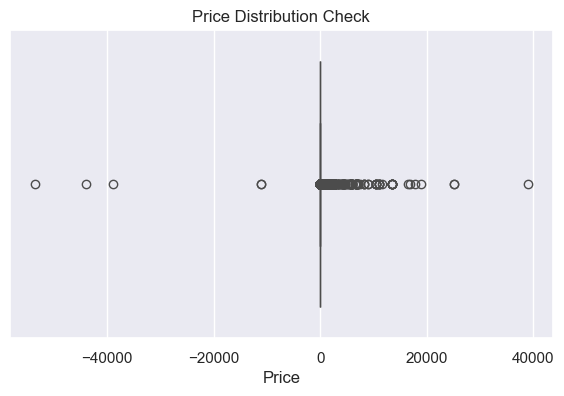

,count,mean,std,min,25%,50%,75%,max
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0


In [134]:
plt.figure(figsize=(7,4))
plt.title('Price Distribution Check')

sns.boxplot(x=df['Price'], orient='y')
plt.show()

price_desc = pd.DataFrame(df['Price'].describe()).transpose()
display(price_desc)


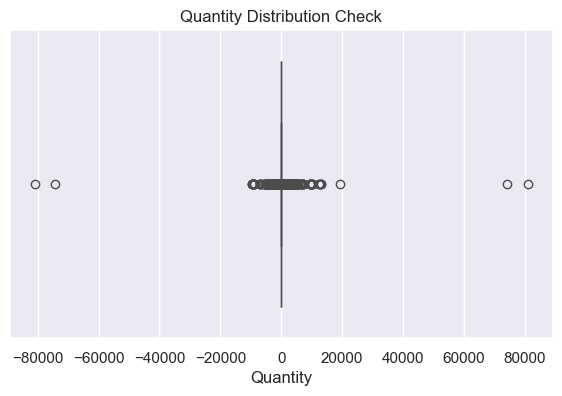

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0


In [135]:
plt.figure(figsize=(7,4))
plt.title('Quantity Distribution Check')

sns.boxplot(x=df['Quantity'], orient='y')
plt.show()

quantity_desc = pd.DataFrame(df['Quantity'].describe()).transpose()
display(quantity_desc)


In [136]:
df_before = df.copy()
df = df.drop_duplicates()

before = len(df_before)
after = len(df)
removed = before - after
pct_removed = round((removed / before * 100),2)

removal_summary = pd.DataFrame({
    'Before': [before],
    'After': [after],
    'Removed': [removed],
    'Pct_Removed (%)': [pct_removed]
})

display(removal_summary)

,Before,After,Removed,Pct_Removed (%)
0,1067371,1033036,34335,3.22


In [137]:
description_modus = df['Description'].mode()[0]
df['Description'] = df['Description'].fillna(description_modus)

customer_modus = df['Customer ID'].mode()[0]
df['Customer ID'] = df['Customer ID'].fillna(customer_modus)

isna_counts = df.isna().sum().to_dict()
isna_counts = pd.DataFrame.from_dict(isna_counts, orient='index', columns=['Count']).sort_values(ascending=False, by='Count')
isna_counts['Percentage'] = round((isna_counts['Count'] / len(df)) * 100, 2)
print('Count of Missing Values:')
display(isna_counts)

Count of Missing Values:


,Count,Percentage
Invoice,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
Price,0,0.0
Customer ID,0,0.0
Country,0,0.0


In [138]:
df_before = df.copy()
cols = ['Quantity', 'Price']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

before = len(df_before)
after = len(df)
removed = before - after
pct_removed = round((removed / before * 100),2)

removal_summary = pd.DataFrame({
    'Before': [before],
    'After': [after],
    'Removed': [removed],
    'Pct_Removed (%)': [pct_removed]
})

display(removal_summary)

,Before,After,Removed,Pct_Removed (%)
0,1033036,853804,179232,17.35


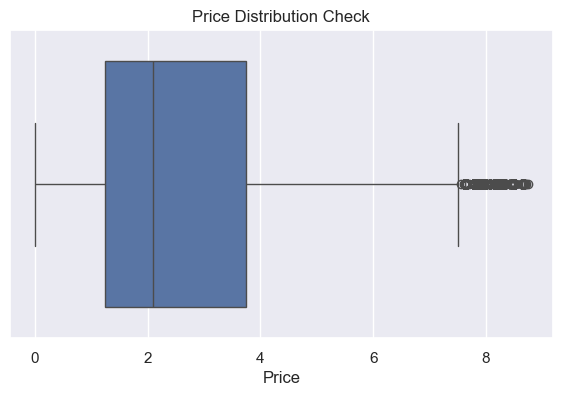

,count,mean,std,min,25%,50%,75%,max
Price,853804.0,2.823657,2.048427,0.0,1.25,2.1,3.75,8.74


In [139]:
plt.figure(figsize=(7,4))
plt.title('Price Distribution Check')

sns.boxplot(x=df['Price'], orient='y')
plt.show()

price_desc = pd.DataFrame(df['Price'].describe()).transpose()
display(price_desc)


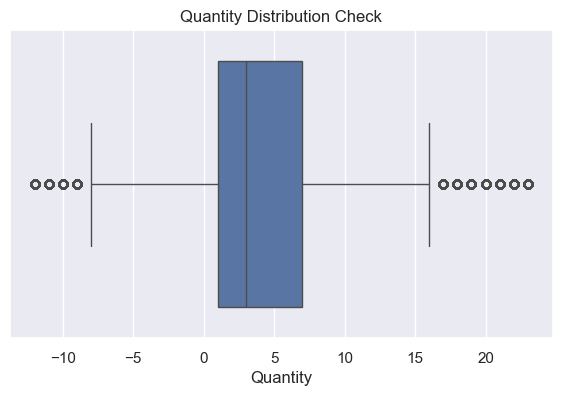

,count,mean,std,min,25%,50%,75%,max
Quantity,853804.0,4.780111,4.594313,-12.0,1.0,3.0,7.0,23.0


In [140]:
plt.figure(figsize=(7,4))
plt.title('Quantity Distribution Check')

sns.boxplot(x=df['Quantity'], orient='y')
plt.show()

quantity_desc = pd.DataFrame(df['Quantity'].describe()).transpose()
display(quantity_desc)


In [141]:
df_before = df.copy()

datetime_cols = ['InvoiceDate']
category_cols = ['Customer ID','Country','StockCode','Description','Invoice']
int_cols = ['Quantity']
float_cols = ['Price']

df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime, unit='D', origin='1899-12-30')
df['Customer ID'] = df['Customer ID'].astype(int)
df[category_cols] = df[category_cols].astype('category')
df[int_cols] = df[int_cols].astype('int64')
df[float_cols] = df[float_cols].astype('float64')

In [142]:
df_before.info()

<class 'pandas.DataFrame'>
Index: 853804 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      853804 non-null  object 
 1   StockCode    853804 non-null  object 
 2   Description  853804 non-null  object 
 3   Quantity     853804 non-null  int64  
 4   InvoiceDate  853804 non-null  float64
 5   Price        853804 non-null  float64
 6   Customer ID  853804 non-null  float64
 7   Country      853804 non-null  str    
dtypes: float64(3), int64(1), object(3), str(1)
memory usage: 58.6+ MB


In [143]:
df.info()

<class 'pandas.DataFrame'>
Index: 853804 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      853804 non-null  category      
 1   StockCode    853804 non-null  category      
 2   Description  853804 non-null  category      
 3   Quantity     853804 non-null  int64         
 4   InvoiceDate  853804 non-null  datetime64[ns]
 5   Price        853804 non-null  float64       
 6   Customer ID  853804 non-null  category      
 7   Country      853804 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 36.7 MB


In [144]:
df = df.rename(columns={
    'Customer ID': 'Customer',
    'InvoiceDate': 'Date'
})
df

,Invoice,StockCode,Description,Quantity,Date,Price,Customer,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:44:59.999999786,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:44:59.999999786,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:44:59.999999786,6.75,13085,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:44:59.999999786,5.95,13085,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:45:59.999999981,2.55,13085,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:49:59.999999721,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:49:59.999999721,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:49:59.999999721,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:49:59.999999721,4.15,12680,France


In [145]:
df = df.assign(
    Hour = df['Date'].dt.hour.astype('int64'),
    Year = df['Date'].dt.year.astype('int64'),
    Month = df['Date'].dt.month.astype('int64'),
    Day = df['Date'].dt.day.astype('int64'),
    Week = df['Date'].dt.isocalendar().week.astype('int64'),
    DayName = df['Date'].dt.day_name().astype('category'),
    MonthName = df['Date'].dt.month_name().astype('category')
)

In [146]:
df['TotalPrice'] = (df['Quantity'] * df['Price']).astype('float64')

In [147]:
df['Date'] = df['Date'].dt.normalize()

In [148]:
df.to_csv('../datasets/online-retail-ii-cleaned.csv.gz', sep=';', index=False)

In [149]:
df.info()
df.head()

<class 'pandas.DataFrame'>
Index: 853804 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      853804 non-null  category      
 1   StockCode    853804 non-null  category      
 2   Description  853804 non-null  category      
 3   Quantity     853804 non-null  int64         
 4   Date         853804 non-null  datetime64[ns]
 5   Price        853804 non-null  float64       
 6   Customer     853804 non-null  category      
 7   Country      853804 non-null  category      
 8   Hour         853804 non-null  int64         
 9   Year         853804 non-null  int64         
 10  Month        853804 non-null  int64         
 11  Day          853804 non-null  int64         
 12  Week         853804 non-null  int64         
 13  DayName      853804 non-null  category      
 14  MonthName    853804 non-null  category      
 15  TotalPrice   853804 non-null  float64       
dtype

,Invoice,StockCode,Description,Quantity,Date,Price,Customer,Country,Hour,Year,Month,Day,Week,DayName,MonthName,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom,7,2009,12,1,49,Tuesday,December,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,7,2009,12,1,49,Tuesday,December,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,7,2009,12,1,49,Tuesday,December,81.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01,5.95,13085,United Kingdom,7,2009,12,1,49,Tuesday,December,59.5
8,489435,22350,CAT BOWL,12,2009-12-01,2.55,13085,United Kingdom,7,2009,12,1,49,Tuesday,December,30.6
